# ARIMA Models in Python

> Learn to use the powerful ARIMA class models to forecast the future. Updating ...

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Seasonal Data, Forecast, ARIMA, Time Series, ARMA, ARMAX, AIC ,BIC ,ACF ,PACF, SARIMA, Box-Jenkins]
- image: images/arima.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


In [9]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.expand_frame_repr', False)


import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = (16, 16)
mpl.rcParams['axes.grid'] = True


warnings.filterwarnings("ignore")

> Have you ever tried to predict the future? What lies ahead is a mystery which is usually only solved by waiting. In this course, you will stop waiting and learn to use the powerful ARIMA class models to forecast the future. You will learn how to use the statsmodels package to analyze time series, to build tailored models, and to forecast under uncertainty. How will the stock market move in the next 24 hours? How will the levels of CO2 change in the next decade? How many earthquakes will there be next year? You will learn to solve all these problems and more.

## ARMA Models

> Dive straight in and learn about the most important properties of time series. You'll learn about stationarity and how this is important for ARMA models. You'll learn how to test for stationarity by eye and with a standard statistical test. Finally, you'll learn the basic structure of ARMA models and use this to generate some ARMA data and fit an ARMA model.


### Intro to time series and stationarity

> **Exploration**

You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

Instructions: <br>

- Import matplotlib.pyplot giving it the alias plt and import pandas giving it the alias pd.
- Load in the candy production time series 'candy_production.csv' using pandas, set the index to the'date'column, parse the dates and assign it to the variable candy.
- Plot the time series onto the axis ax1 using the DataFrame's .plot() method. Then show the plot.

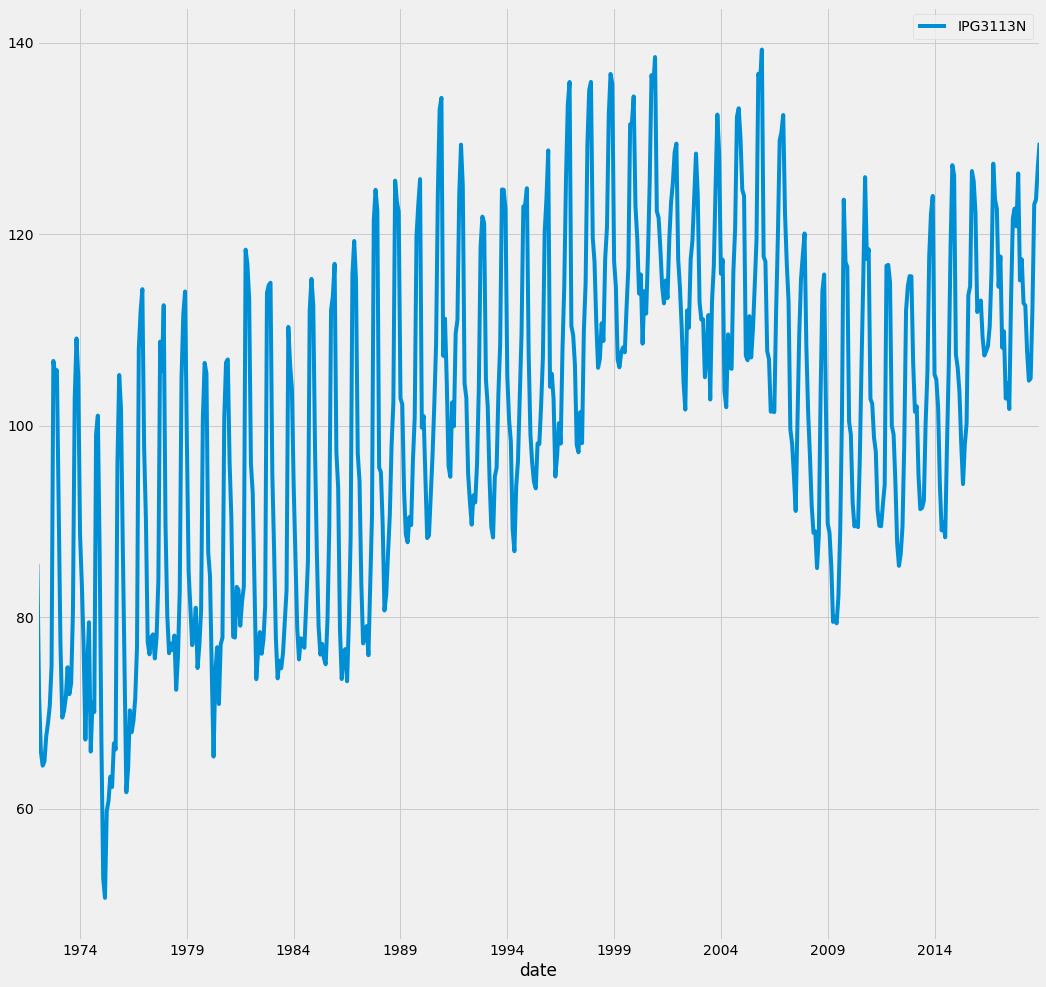

In [5]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('./datasets/candy_production.csv', index_col='date', parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

This plotting method will be invaluable later when plotting multiple things on the same axis! Can you tell whether this is a stationary time series or not? How does it change throughout the years?

> **Train-test splits**

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

Instructions: <br>

- Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.
- Make a pyplot axes using the subplots() function.
- Use the DataFrame's .plot() method to plot the train and test sets on the axis ax.

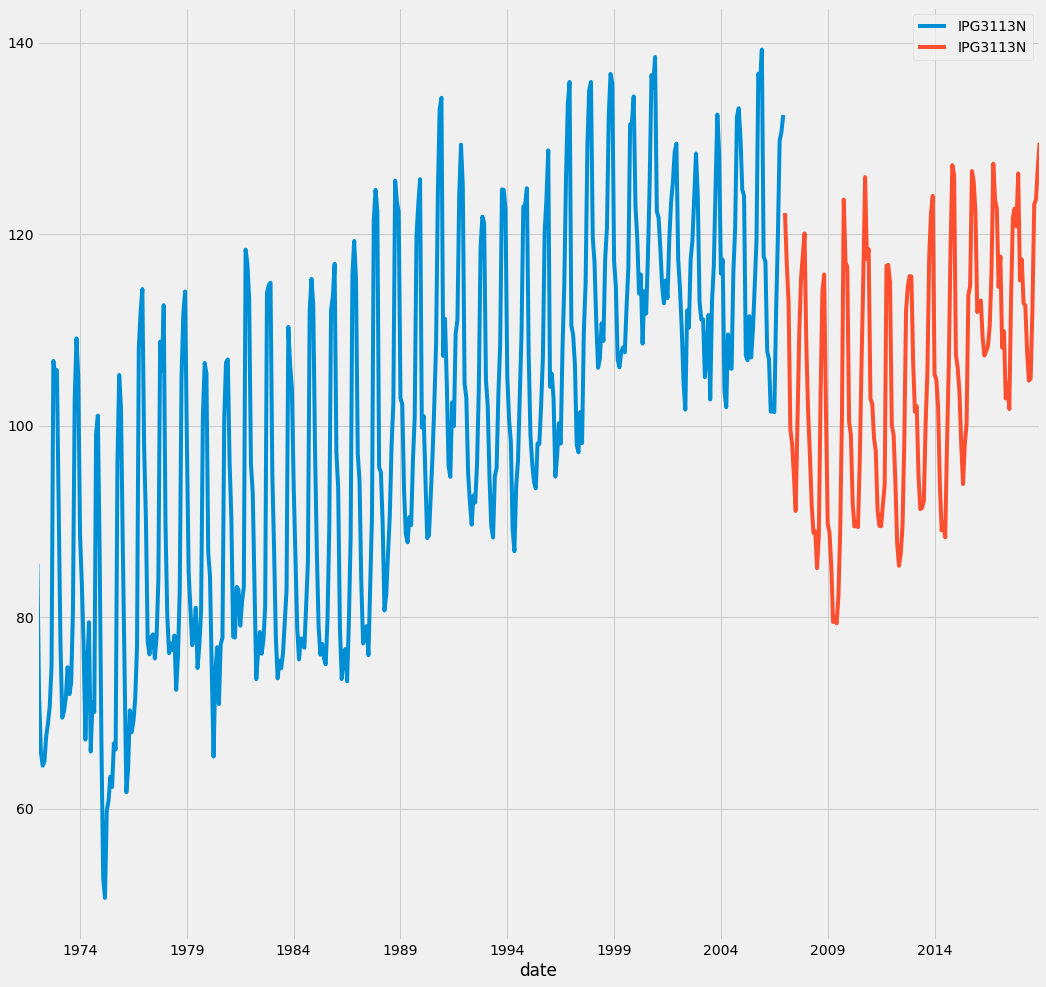

In [6]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

> **Is it stationary**

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

![](./images/download.svg)



1. The top plot shown is a time series of Amazon stock close price.
Is the stock close price stationary?

    Ans: No, because the top plot has a trend. 

2. The middle plot shown is a time series of the return (percentage increase of price per day) of Amazon stock.
Is the stock return stationary?

    Ans: No, because in the middle plot, the variance changes with time. 

3. The bottom plot is a time series of the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).
Is the number of major earthquakes per year stationary?

    Ans: Yes, the bottom plot appears to be stationary.

    You can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.

### Making time series stationary


> **Augmented Dicky-Fuller**

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

Instructions: <br>

- Import the augmented Dicky-Fuller function adfuller() from statsmodels.
- Run the adfuller() function on the 'earthquakes_per_year' column of the earthquake DataFrame and assign the result to result.
- Print the test statistic, the p-value and the critical values.

In [15]:
earthquake = pd.read_csv('./datasets/earthquakes.csv', usecols=['date', 'earthquakes_per_year'], parse_dates=['date'])
display(earthquake.head())

,date,earthquakes_per_year
0,1900-01-01,13.0
1,1901-01-01,14.0
2,1902-01-01,8.0
3,1903-01-01,10.0
4,1904-01-01,16.0


In [16]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


Earth shaking effort! You can reject the null hypothesis that the time series is non-stationary. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.

> **Taking the difference**

n this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

Instructions: <br>

- Run the augmented Dicky-Fuller on the 'city_population' column of city.
- Print the test statistic and the p-value.
- Take the first difference of city dropping the NaN values. Assign this to city_stationary and run the test again.
- Take the second difference of city, by applying the .diff() method twice and drop the NaN values.

In [35]:
city = pd.read_csv('./datasets/city.csv', parse_dates=['date'], index_col=['date'])
city.head()

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


In [36]:
city.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1969-09-30 to 2019-03-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_population  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


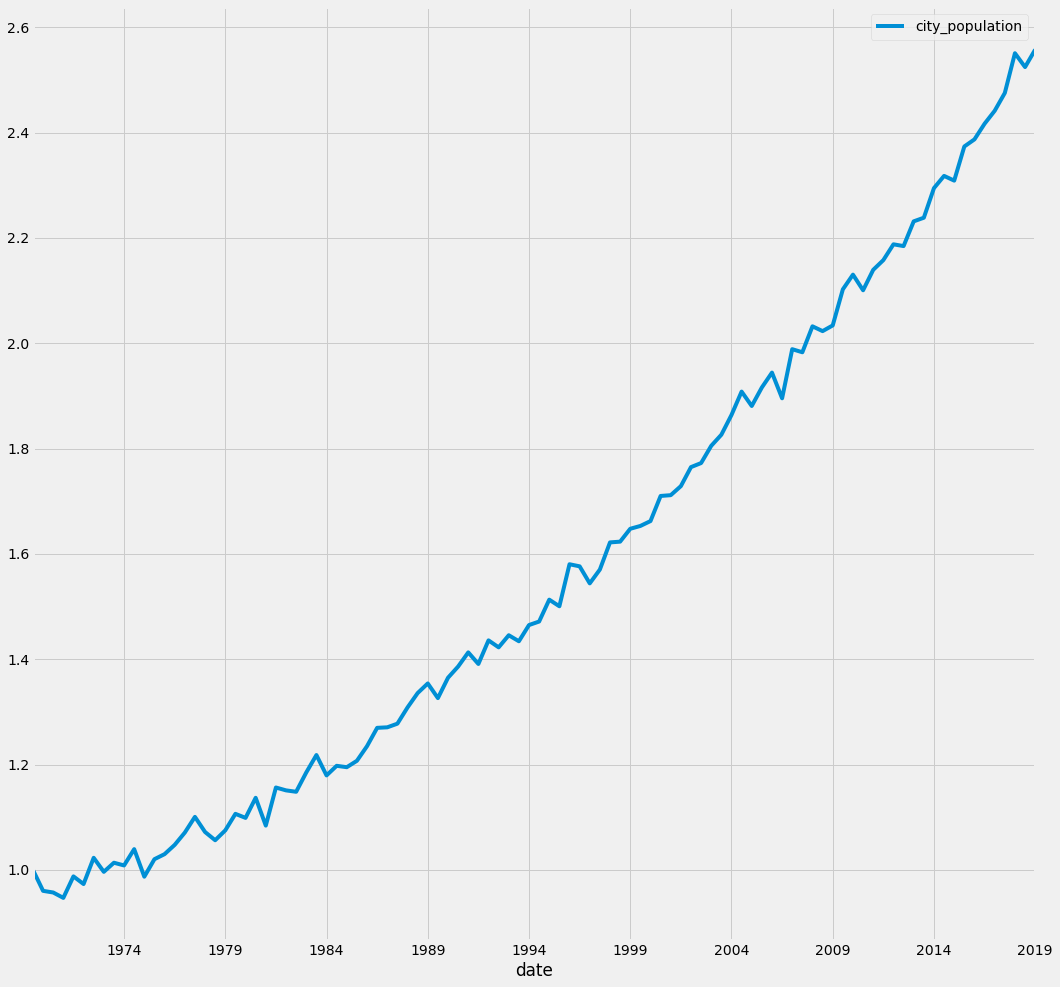

ADF Statistic: 5.297698878151179
p-value: 1.0


In [37]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

> **Other tranforms**

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

$$ \text{log\_return}(y_t) = \log \big(\frac{y_t}{y_{t-1}}\big) $$

You can calculate the log-return of this DataFrame by substituting:

$y_t$ → amazon

$y_{t-1}$ → amazon.shift(1)

$\log()$ → ```np.log()```

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [38]:
amazon = pd.read_csv('./datasets/amazon_close.csv', index_col='date', parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


- Calculate the first difference of the time series amazon to test for stationarity and drop the NaNs.

In [39]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.2035794888112505, 2.331271725487086e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


- Calculate the log return on the stocks time series amazon to test for stationarity.

In [40]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon.div(amazon.shift(1)))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.2035794888112505, 2.331271725487086e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605965, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more negative test statistic. This means the log-return tranformation is better.

### Intro to AR, MA and ARMA models


> **Model order**

When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

Instructions: <br>

- Print ar_coefs and ma_coefs which are available in the console. If you were to use these in the arma_generate_sample() function what would be the order of the data?

    ```python:
    print(ar_coefs)
    [1, 0.4, -0.1]

    print(ma_coefs)
    [1, 0.2]

    ```
    **Ans:** ARMA(2,1)

- Print ar_coefs and ma_coefs which are available in the console. If you were to use these in the arma_generate_sample() function what would the lag-1 AR coefficient?

    **Ans:** -0.4

- Which of these models is equivalent to an AR(1) model?

    **Ans:** ARMA(1,0)


Note that setting either p or q to zero means we get a simpler model, either a AR or MA model.

> **Generating ARMA data**

In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q): <br>

- The list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p].
- The list ma_coefs has the form [1, m_1, m_2, ..., m_q],

where a_i are the lag-i AR coefficients and m_j are the lag-j MA coefficients.

Instructions: <br>

- Set **ar_coefs** and **ma_coefs** for an MA(1) model with MA lag-1 coefficient of -0.7.
- Generate a time series of 100 values.
- Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.
- Set the coefficients for a model with form $ y_t = -0.2 y_{t-1} + 0.3 \epsilon_{t-1} + 0.4 \epsilon_{t-2} + \epsilon_{t}$

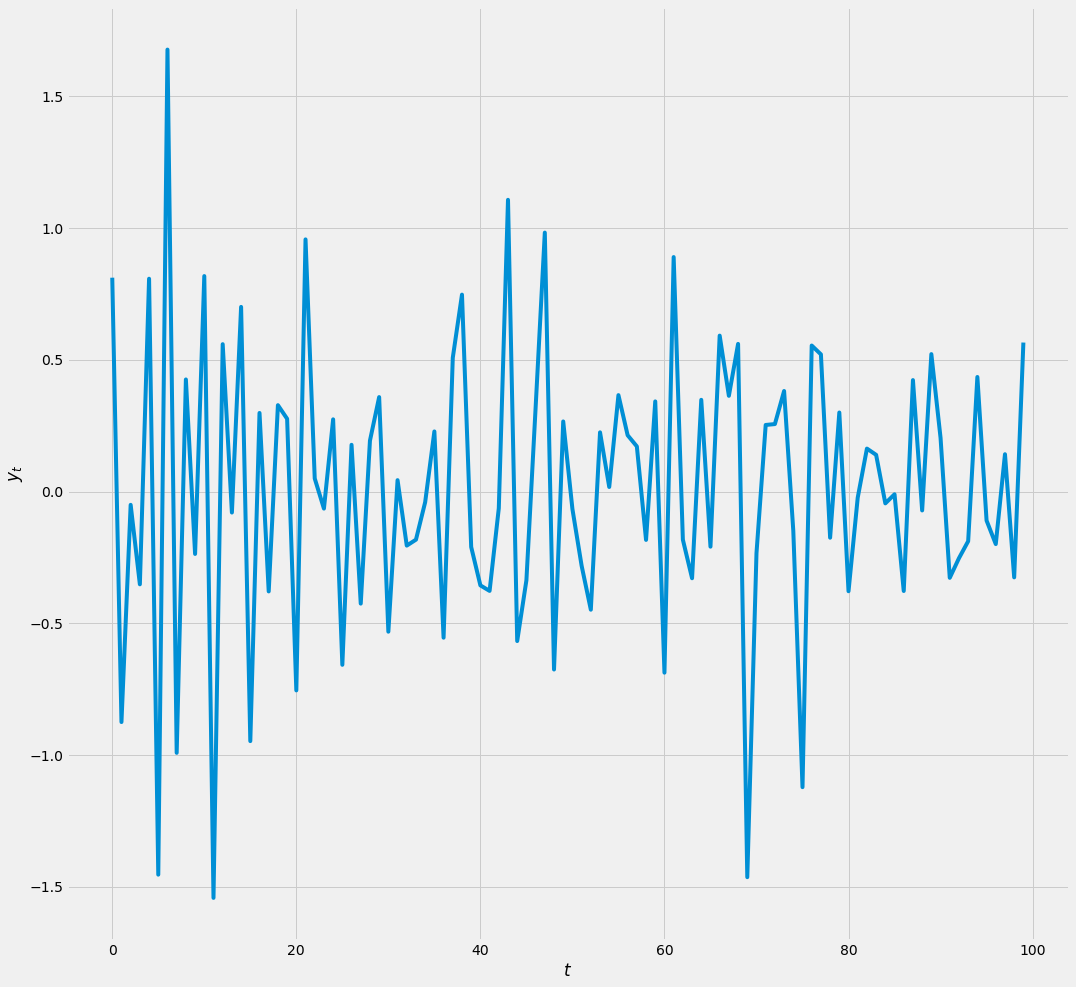

In [41]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

You can use this data to check our code. If you can recover these same coefficients when you fit a model, then you will know your methods work!

> **Fitting Prelude**

Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

Instructions: <br>

- Import the ARMA model class from the statsmodels.tsa.arima_model submodule.
- Create a model object, passing it the time series y and the model order (1,1). Assign this to the variable model.
- Use the model's .fit() method to fit to the data.


CODE: 

```python
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 1))

# Fit the model
results = model.fit()
```

## Fitting the Future

> What lies ahead in this chapter is you predicting what lies ahead in your data. You'll learn how to use the elegant statsmodels package to fit ARMA, ARIMA and ARMAX models. Then you'll use your models to predict the uncertain future of stock prices!

### Fitting time series models

> **Fitting AR and MA models**

In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.

Instructions: <br>

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_1' data?

Possible Answers

- ar_coefs = [0.9, 0.3],  
  ma_coefs = [1]

- ar_coefs = [1] ,  
  ma_coefs = [1, -0.9, 0.3]

- **ar_coefs = [1, -0.9, 0.3],  
  ma_coefs = [1]**

- ar_coefs = [1, 0.9, -0.3],  
  ma_coefs = [1]


Previous Code Version:
```python
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())
```

In [46]:
sample = pd.read_csv('./datasets/sample.csv', index_col=0)
sample.head()

,timeseries_1,timeseries_2
0,-0.183108,-0.183108
1,-0.245540,-0.117365
2,-0.258830,-0.218789
3,-0.279635,-0.169041
4,-0.384736,-0.282374


In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=(2, 0, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 148.855
Date:                Fri, 16 Sep 2022   AIC                           -289.709
Time:                        15:29:04   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1          0.8980      0.031     28.660      0.000       0.837       0.959
ar.L2         -0.2704      0.032     -8.561      0.0

- Fit an MA(3) model to the 'timeseries_2' column of sample.

```python

model = ARMA(sample['timeseries_2'], order=(0, 3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())
```

In [51]:
model = ARIMA(sample['timeseries_2'], order=(0, 0, 3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 149.007
Date:                Fri, 16 Sep 2022   AIC                           -288.014
Time:                        15:31:17   BIC                           -263.475
Sample:                             0   HQIC                          -278.687
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.012     -0.158      0.875      -0.025       0.021
ma.L1          0.1995      0.032      6.183      0.000       0.136       0.263
ma.L2          0.6359      0.025     25.435      0.0

Using the information in the summary printed, which of the following set of parameters do you think was used to generate the 'timeseries_2' data?

- ar_coefs = [],  
  ma_coefs = [0.2, 0.6, 0.1]

- **ar_coefs = [1],   
  ma_coefs = [1, 0.2, 0.6, -0.1]**

- ar_coefs = [1, 0.2, 0.6, -0.1], 
  ma_coefs = [1]

- ar_coefs = [1], 
  ma_coefs = [1, -0.2, -0.6, 0.1]


The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!

> **Fitting an ARMA model**

In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

![](./images/earthquakes.png)

The earthquakes dataset is available in your environment as earthquake. The ARMA class is also available in your environment.

Instructions: <br>

- Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.
- Fit the model.
- Print the summary of the model fit.


Previous version Code:

```python
# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())
```

In [53]:
# Instantiate the model
model = ARIMA(earthquake['earthquakes_per_year'], order=(3, 0 ,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Fri, 16 Sep 2022   AIC                            643.345
Time:                          16:12:01   BIC                            658.916
Sample:                               0   HQIC                           649.645
                                   - 99                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

> **Fitting an ARMAX model**

In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

![](./images/exog_time_series.png)

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as hospital and has the two columns mentioned above. The ARMA class is also available for you.

Instructions: <br>

- Instantiate an ARMAX(2,1) model to train on the 'wait_times_hrs' column of hospital using the 'nurse_count' column as an exogenous variable.
- Fit the model.
- Print the summary of the model fit.

In [56]:
hospital = pd.read_csv('./datasets/hospital.csv', index_col=0, parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


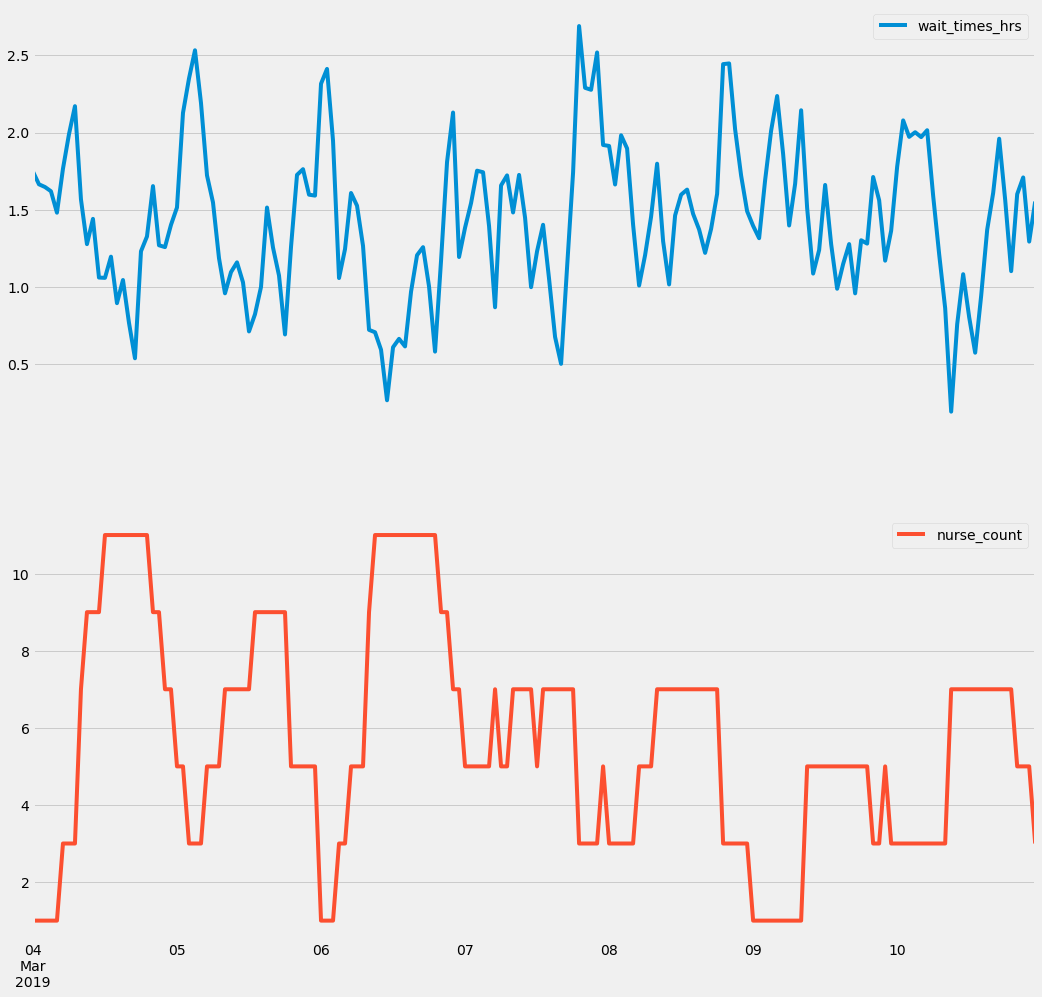

In [64]:
hospital.plot(subplots=True)

In [59]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2, 0, 1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Fri, 16 Sep 2022   AIC                             35.668
Time:                        16:19:16   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?

### Forecasting


> **Generating one-step-ahead predictions**

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.

Instructions: <br>

- Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to one_step_forecast.
- Assign your mean predictions to mean_forecast using one of the attributes of the one_step_forecast object.
- Extract the confidence intervals of your predictions from the one_step_forecast object and assign them to confidence_intervals.
- Print your mean predictions.


In [2]:
amazon = pd.read_csv('./datasets/amazon_close.csv', parse_dates=True, index_col='date')
amazon = amazon.iloc[::-1] 

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1338.384
Date:                             Wed, 21 Sep 2022   AIC                           2694.769
Time:                                     11:22:19   BIC                           2727.020
Sample:                                          0   HQIC                          2707.725
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1073      0.048      2.254      0.024       0.014       0.201
ar.L2          0.0524      0.038      1.364      0.173      -0.023       0.128
ar.L3         -0.8974      0.042    -21.570      0.000      -0.979      -0.816
ma.L1         -0.1213      0.035     -3.454      0.001      -0.190      -0.052
ma.L2         -0.1399      0.030     -4.687      0.000      -0.198      -0.081
ma.L3          0.9676      0.041     23.685      0.000       0.888       1.048
ar.S.L7        0.1793      0.679      0.264      0.792      -1.151       1.510
ma.S.L7       -0.2211      0.670     -0.330      0.741      -1.534       1.092
sigma2      1330.2167    105.301     12.632      0.000    1123.830    1536.604
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                22.04
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1475.3177152  1462.82939534 1470.99716775 1498.14114408 1537.481212
 1508.05770467 1581.1300112  1627.20560637 1650.13789471 1649.60020059
 1657.74681448 1648.08617217 1625.77703479 1671.07888944 1672.24480816
 1683.47668622 1693.7243828  1642.58501585 1657.17562424 1652.33467822
 1661.07408768 1620.97279346 1594.77844225 1679.51646296 1724.87138179
 1629.29180439 1638.12464624 1647.54825417 1636.54639718 1606.77990271]


The predictions told me you could do it! You can use theis one-step-ahead forecast to estimate what your error would be, if you were to make a prediction for the Amazon stock price of tomorrow.

> **Plotting one-step-ahead predictions**

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.

Instructions: <br>

- Plot the amazon data, using the amazon.index as the x coordinates.
- Plot the mean_forecast prediction similarly, using mean_forecast.index as the x-coordinates.
- Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of lower_limits as the x coordinates.



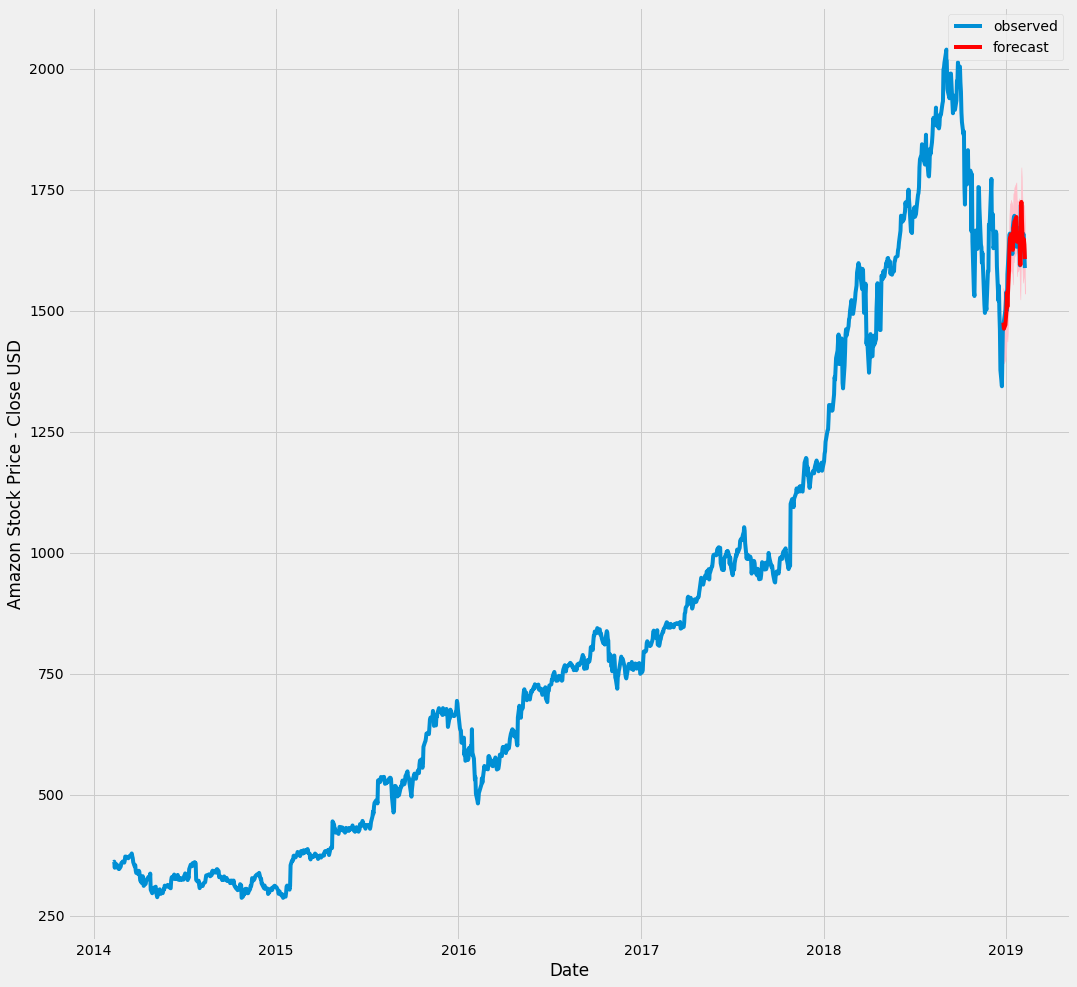

In [10]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# Plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?

> **Generating dynamic forecasts**

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

Instructions: <br>

- Use the results object to make a dynamic predictions for the latest 30 days and assign the result to dynamic_forecast.
- Assign your predictions to a new variable called mean_forecast using one of the attributes of the dynamic_forecast object.
- Extract the confidence intervals of your predictions from the dynamic_forecast object and assign them to a new variable confidence_intervals.
- Print your mean predictions.


In [11]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower close']
upper_limits = confidence_intervals.loc[:, 'upper close']

# Print bet estimate predictions
print(mean_forecast.values)

[1475.3177152  1476.30086318 1468.30475982 1467.08185032 1468.0879851
 1478.00078259 1476.74011337 1479.95043998 1472.49041523 1469.76295128
 1466.83447614 1473.50927358 1477.00252706 1479.73229773 1474.88658774
 1471.58218617 1467.94562326 1471.84495505 1475.11666747 1479.02208562
 1476.00155849 1473.06575438 1469.12486989 1471.1552069  1473.82171558
 1477.76489764 1476.52115465 1474.1812682  1470.34780652 1470.93670523]


> **Plotting dynamic forecasts**

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.

Instructions:<br>

- Plot the amazon data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.
- Plot the mean_forecast predictions similarly.
- Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of one of these DataFrames as the x coordinates.


In [23]:
amazon = amazon.loc['2017-12':]
amazon.head()

,close
date,
2017-12-01,1162.35
2017-12-04,1133.95
2017-12-05,1141.57
2017-12-06,1152.35
2017-12-07,1159.79


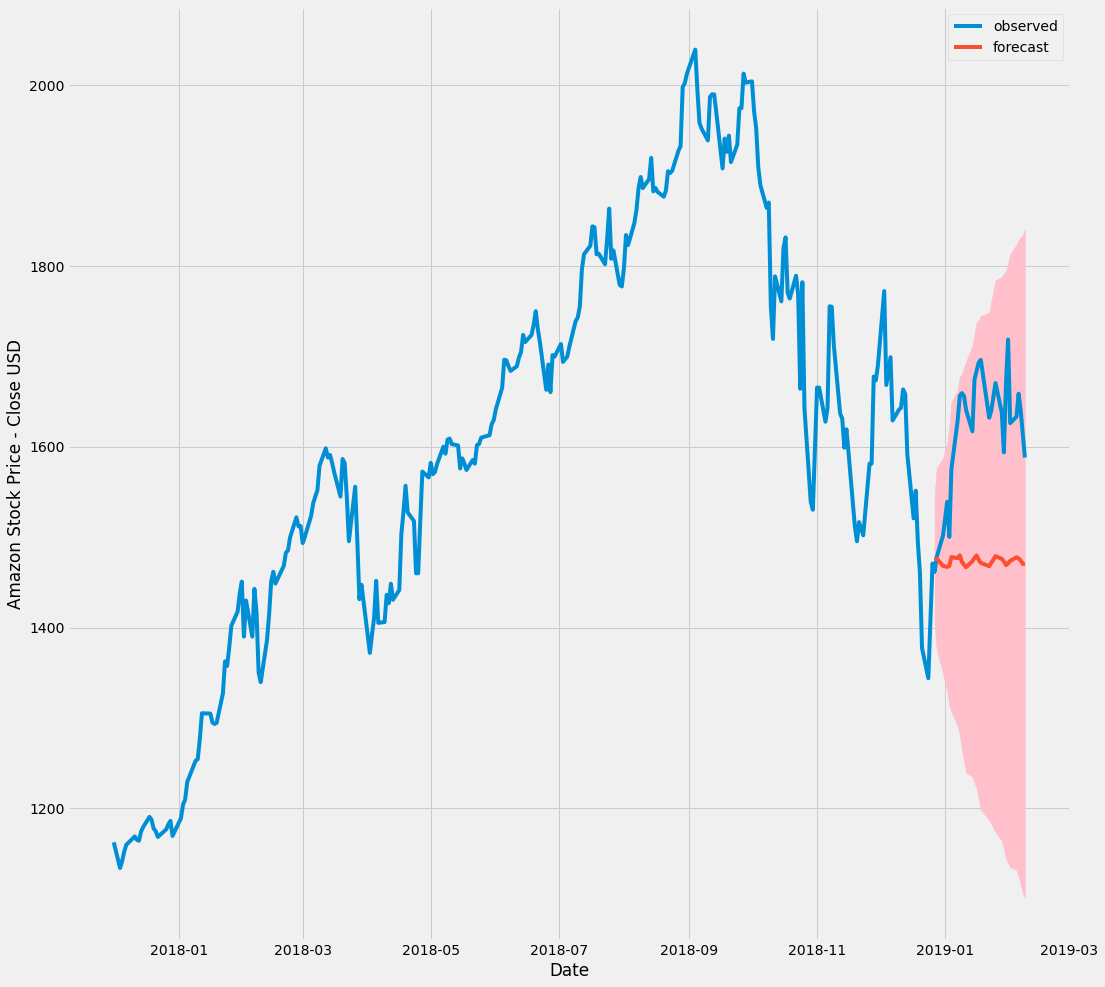

In [24]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# Plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, label='forecast')

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

 It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!

### Intro to ARIMA models


> **Differencing and fitting ARMA**

In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series in available in your environment as amazon. The SARIMAX model class is also available in your environment.

Instructions: <br>

- Use the .diff() method of amazon to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the .dropna() method.
- Create an ARMA(2,2) model using the SARIMAX class, passing it the stationary data.
- Fit the model.

In [41]:
amazon = pd.read_csv('./datasets/amazon_close.csv', parse_dates=True, index_col='date')
display(amazon.head())
amazon.sort_index(inplace=True)
display(amazon.head())

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


In [42]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2, 2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.146
Date:                Wed, 21 Sep 2022   AIC                          11072.293
Time:                        11:48:22   BIC                          11097.979
Sample:                             0   HQIC                         11081.946
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0765      0.004    266.491      0.000       1.069       1.084
ar.L2         -0.9949      0.004   -281.345      0.000      -1.002      -0.988
ma.L1         -1.0916      0.006   -183.352      0.0

> **Unrolling ARMA forecast**

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

Instructions: <br>

- Use the .get_forecast() method of the arma_results object and select the predicted mean of the next 10 differences.
- Use the np.cumsum() function to integrate your difference forecast.
- Add the last value of the original DataFrame to make your forecast an absolute value.


In [43]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.849815
1259    1602.436788
1260    1606.079271
1261    1601.456816
1262    1592.856683
1263    1588.197762
1264    1591.739121
1265    1600.186757
1266    1605.757149
1267    1603.348712
Name: predicted_mean, dtype: float64


You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.

> **Fitting an ARIMA model**

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the SARIMAX model class.

Instructions: <br>

- Create an ARIMA(2,1,2) model, using the SARIMAX class, passing it the Amazon stocks data amazon.
- Fit the model.
- Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to arima_value_forecast.


In [44]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1259    1594.835550
1260    1601.966500
1261    1603.148594
1262    1597.457566
1263    1590.210114
1264    1588.001310
1265    1592.706550
1266    1599.900020
1267    1603.012741
1268    1599.328121
Name: predicted_mean, dtype: float64


You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!

> **Choosing ARIMA model**

## The Best of the Best Models

> In this chapter, you will become a modeler of discerning taste. You'll learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you'll learn how to choose the best model from this fitted selection. You'll also learn a great framework for structuring your time series projects.



### Intro to ACF and PACF

> **AR or MA**

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

|      | AR(p)                | MA(q)                | ARMA(p,q) |
|------|----------------------|----------------------|-----------|
| ACF  | Tails off            | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off            | Tails off |

A time series with unknown properties, df is available for you in your environment.

Instructions:<br>

- Import the plot_acf and plot_pacf functions from statsmodels.
- Plot the ACF and the PACF for the series df for the first 10 lags but not the zeroth lag.

In [51]:
df = pd.read_csv('./datasets/download.csv', parse_dates=True, index_col=[0])
df = df.asfreq('d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2013-01-01 to 2015-09-27
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [53]:
df.head()

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


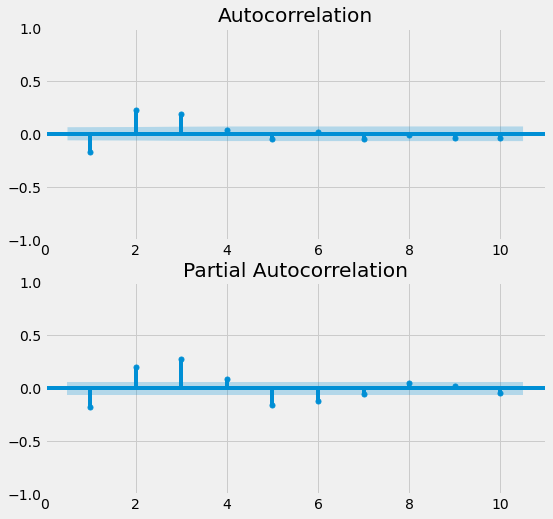

In [52]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

> **Order of earthquakes**

In [54]:
amazon_diff2 = pd.read_csv('./datasets/amazondiff.csv', parse_dates=True, index_col=['date'])
print(amazon_diff2)

            close
date             
2019-02-07  26.15
2019-02-06  25.89
2019-02-05  18.55
2019-02-04 -25.50
2019-02-01  -7.08
...           ...
2014-02-14   3.70
2014-02-13  -0.15
2014-02-12  -7.95
2014-02-11  12.54
2014-02-10  -0.92

[1258 rows x 1 columns]


### Intro to AIC and BIC

> **Searching over model order**

> **Choosing order with AIC and BIC**

> **AIC and BIC vs ACF and PACF**

### Model diagnostics

> **Mean absolute error**

> **Diagnostic summary statistics**

> **Plot diagnostics**

### Box-Jenkins method

> **Identification**

> **Identification II**

> **Estimation**

> **Diagnostics**

## Seasonal ARIMA Models

> In this final chapter, you'll learn how to use seasonal ARIMA models to fit more complex data. You'll learn how to decompose this data into seasonal and non-seasonal parts and then you'll get the chance to utilize all your ARIMA tools on one last global forecast challenge.

### Seasonal time series

> **Seasonal decompose**


> **Seasonal ACF and PACF**


### SARIMA models


> **Fitting SARIMA models**


> **Choosing SARIMA order**


> **SARIMA vs ARIMA forecasts**


### Automation and saving


> **Automated model selection**


> **Saving and updating models**


### SARIMA and Box-Jenkins


> **Multiplicative vs additive seasonality**


> **SARIMA model diagnostics**


> **SARIMA forecast**


### Congratulations!